# 1. What is PCA?
**Definition:** 
1. PCA is a dimensionality reduction algorithm. It tries to reduce the dimension while retaining most of the original information.
2. Creation of new variables using old variables which would mean they are a combination of old variables and are uncorrelated to each other which simplifies the analysis.
3. Helps in plotting high dimensional data to lower dimension, say scatter plot in 3d using plotly. 

**Working:** 
1. Standardize or scale the input features.
2. Find covariance matrix
3. Find Eigen Values and Eigen Vectors

In [27]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = make_blobs(n_samples=50, n_features=3, shuffle=True)
input = np.array(data[0])
output = np.array(data[1])
# input
# output

input_df = pd.DataFrame({
    'feature_1': input[:, 0],
    'feature_2': input[:, 1],
    'feature_3': input[:, 2],
    'label': output
})
input_df.describe()

,feature_1,feature_2,feature_3,label
count,50.000000,50.000000,50.000000,50.000000
mean,-3.891446,-0.278521,4.545030,0.980000
std,2.038150,2.887998,3.203545,0.820403
min,-7.604579,-5.972706,-1.323107,0.000000
25%,-5.332310,-3.287079,1.828848,0.000000
50%,-4.130035,0.864040,4.752929,1.000000
75%,-2.233448,1.790319,7.156035,2.000000
max,0.562749,3.891450,9.819870,2.000000


In [2]:
import plotly.express as px

fig = px.scatter_3d(input_df, x='feature_1', y='feature_2', z='feature_3', color='label')
fig.show()

In [ ]:
scaled_data = StandardScaler().fit_transform(input_df.iloc[:, 0:3])
scaled_data.shape
scaled_df = pd.DataFrame({
    'feature_1': scaled_data[:, 0],
    'feature_2': scaled_data[:, 1],
    'feature_3': scaled_data[:, 2]
})
scaled_df = pd.concat([scaled_df, input_df.iloc[:, 3:]], axis=1)
scaled_df.head()

,feature_1,feature_2,feature_3,label
0,1.473399,-1.375379,1.172727,2
1,0.231270,0.750032,-1.725148,1
2,-0.208435,0.639489,-1.083628,1
3,-0.075864,0.646558,-1.078258,1
4,-1.332797,0.817168,-0.077840,0


In [15]:
scaled_df.describe()

,feature_1,feature_2,feature_3,label
count,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,0.000000,-8.881784e-18,1.720846e-17,0.980000
std,1.010153,1.010153e+00,1.010153e+00,0.820403
min,-1.511267,-1.870103e+00,-1.725148e+00,0.000000
25%,-0.932282,-1.322602e+00,-1.072790e+00,0.000000
50%,-0.100846,5.914627e-01,2.460170e-02,1.000000
75%,1.110028,7.236316e-01,1.061934e+00,2.000000
max,1.578857,1.027086e+00,1.567772e+00,2.000000


In [16]:
# To prvode scaling doesn't changes properties of independent variabless.
import plotly.express as px

fig = px.scatter_3d(scaled_df, x='feature_1', y='feature_2', z='feature_3', color='label')
fig.show()

In [17]:
# Step-2: Covariance matrix creation
cov_matrix = np.cov([scaled_df.iloc[:,0], scaled_df.iloc[:,1], scaled_df.iloc[:,2]])
cov_matrix

array([[ 1.02040816, -0.87029986,  0.55474477],
       [-0.87029986,  1.02040816, -0.88459193],
       [ 0.55474477, -0.88459193,  1.02040816]])

In [18]:
# Step-3: Get eigen values and eigen vector
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values, eigen_vectors

(array([2.56931753, 0.46578595, 0.02612101]),
 array([[-0.54971696,  0.71657939,  0.42933115],
        [ 0.62524732,  0.01212428,  0.78033249],
        [-0.55396485, -0.69740016,  0.45470427]]))

In [25]:
# Step 4: Use the eigen vectors for gtting the PC components
new_input_df = np.dot(scaled_df.iloc[:, 0:3], eigen_vectors[0:2, :].T)
new_input_df = pd.DataFrame({
    'new_feature_1': new_input_df[:, 0],
    'new_feature_2': new_input_df[:, 1],
})
new_input_df = pd.concat([new_input_df, input_df.iloc[:, 3:]], axis=1)
# new_input_df.head()
new_input_df.shape

(50, 3)

C:\Users\rohit\AppData\Local\Temp\ipykernel_15536\3991322316.py:3: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



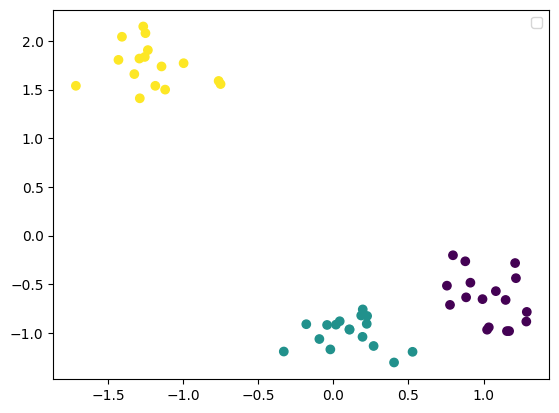

In [34]:
# To prvode scaling doesn't changes properties of independent variabless.
plt.scatter(x=new_input_df['new_feature_1'], y=new_input_df['new_feature_2'], c=new_input_df['label'])
plt.legend()
plt.show()